In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import missingno as msno
import os
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Airbnb Market Trends

As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.

There are three files in the `data` folder: `airbnb_price.csv`, `airbnb_room_type.xlsx`, `airbnb_last_review.tsv`.

* What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.
* How many of the listings are private rooms? Save this into any variable.
* What is the average listing price? Round to the nearest two decimal places and save into a variable.
* Combine the new variables into one DataFrame called `review_dates` with four columns in the following order:
    1. `first_reviewed`,
    2. `last_reviewed`,
    3. `nb_private_rooms`, and
    4. `avg_price`.
    5. The DataFrame should only contain one row of values.

![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [2]:
# To read the files, first get the path for the 'data' directory, (should be in the same directory of the project)
wrkdir=os.getcwd()+'\data\\'
print(wrkdir)
if  not(os.path.isdir(wrkdir)): # Check if the directory exists.
    raise FileNotFoundError(f'Directory {wrkdir} does not exist.')

C:\Users\josue\Documents\Python\datacamp\track_1\Project_Airbnb\data\


In [33]:
data_files=os.listdir('.\data')
print(data_files)
data_paths=[wrkdir+file for file in data_files]
print(data_paths)

['airbnb_last_review.tsv', 'airbnb_price.csv', 'airbnb_room_type.xlsx']
['C:\\Users\\josue\\Documents\\Python\\datacamp\\track_1\\Project_Airbnb\\data\\airbnb_last_review.tsv', 'C:\\Users\\josue\\Documents\\Python\\datacamp\\track_1\\Project_Airbnb\\data\\airbnb_price.csv', 'C:\\Users\\josue\\Documents\\Python\\datacamp\\track_1\\Project_Airbnb\\data\\airbnb_room_type.xlsx']


#### Import and clean 'airbnb_last_review.tsv'

In [4]:
# Analyse first the 'airbnb_last_review.tsv'
df_last_review=pd.read_csv(data_paths[0],
                           delimiter='\t'
                          )
df0=df_last_review # for quickness
assert id(df0)==id(df_last_review)

In [5]:
df0['last_review']

0         May 21 2019
1        July 05 2019
2        June 22 2019
3        June 24 2019
4        June 09 2019
             ...     
25204    July 07 2019
25205    July 07 2019
25206    July 07 2019
25207    July 07 2019
25208    July 08 2019
Name: last_review, Length: 25209, dtype: object

In [6]:
df0['last_review']=pd.to_datetime(df0['last_review'],
                                  format='%B %d %Y'
                            )

In [7]:
df0.sort_values(by='listing_id').head()

,listing_id,host_name,last_review
0,2595,Jennifer,2019-05-21
1,3831,LisaRoxanne,2019-07-05
2,5099,Chris,2019-06-22
3,5178,Shunichi,2019-06-24
4,5238,Ben,2019-06-09


In [8]:
df_last_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25201 non-null  object        
 2   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 591.0+ KB


* There are 8 missing values in `host_name` column.

In [9]:
print(df0[df0['host_name'].isna()])

       listing_id host_name last_review
263        100184       NaN  2019-07-08
3040      4183989       NaN  2019-05-23
4039      6292866       NaN  2019-06-19
4269      6786181       NaN  2019-06-19
6338     12113879       NaN  2019-07-02
8060     15648096       NaN  2019-07-07
12128    21867710       NaN  2019-01-01
12164    21901156       NaN  2019-01-01


In [10]:
# Fill as anonymous
df0.fillna('anonymous',inplace=True)

#### Import and clean 'airbnb_price.csv'

In [11]:
# Analyse second the 'airbnb_price.csv'
df_price=pd.read_csv(data_paths[1],
                           delimiter=',',
                           # index_col=0
                          )
df1=df_price # for quickness
assert id(df1)==id(df_price)

In [12]:
df1.sort_values(by='listing_id').head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


* `price` Column needs to be cleaned.
* `nbhood_full` could be divided in borugh and nbhood

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [14]:
df1.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


**NOTE:** The neighbourhood *'Bay Terrace'* is included in both 'Staten Island' and 'Queens' boroughts. It requires special attention.

In [15]:
df1[df1['nbhood_full'].str.contains('Bay Terrace') ]

,listing_id,price,nbhood_full
2242,2467377,90 dollars,"Queens, Bay Terrace"
2697,3609762,184 dollars,"Queens, Bay Terrace"
3148,4357892,189 dollars,"Queens, Bay Terrace"
17449,29151631,32 dollars,"Queens, Bay Terrace"
21982,33275070,55 dollars,"Staten Island, Bay Terrace, Staten Island"


In [16]:
df1['borough']=[re.search('^[A-Za-z ]+', nbhood).group() for nbhood in df1['nbhood_full']]
df1['borough'].value_counts()

borough
Brooklyn         10466
Manhattan        10322
Queens            3456
Bronx              698
Staten Island      267
Name: count, dtype: int64

In [17]:
df1['nbhood']=[re.search("[A-Z][A-Za-z'\-. ]+$", nbhood).group() for nbhood in df1['nbhood_full']]
df1['nbhood']=df1['nbhood'].replace('Staten Island','Bay Terrace, Staten Island')

In [18]:
comparison=df1['borough']+', '+df1['nbhood'] == df1['nbhood_full']
assert comparison.all() # This ensure the two new columns are the same as the original one

In [19]:
# Now lets remove the currency in the 'price' column
try:
    currencies = list({re.search(r'([^\d\s]+|\b[a-zA-Z]+\b)', currency).group(1) for currency in df1['price']}) # To check the currencies
except:
    pass
print(currencies)

['dollars']


In [20]:
try:
    df1['price']=[re.search("^\d+", price).group() for price in df1['price']]
except:
    pass
df1['price']=df1['price'].astype(int)
df1['borough']=df1['borough'].astype('category')

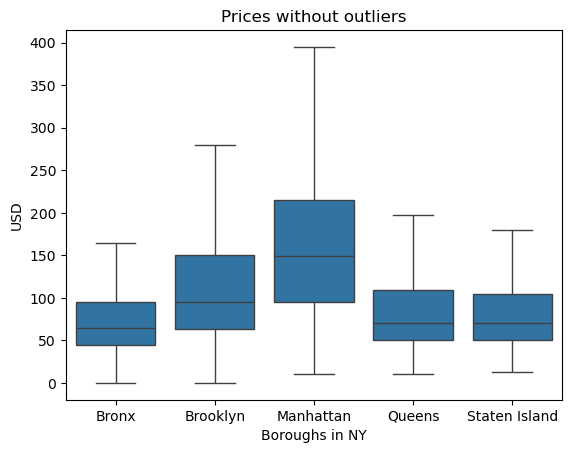

In [21]:
# print(df1.head())
g=sns.boxplot(data=df1,
              y='price',
              x='borough',
              # kind='box',
              # sym="",
              showfliers=False
             )
g.set_title('Prices without outliers')
g.set(xlabel= 'Boroughs in NY',
      ylabel='USD',
     # ylim=(0,1000)
     )
plt.show()

In [22]:
print(df1.head())
print(df1.info())

   listing_id  price                nbhood_full    borough          nbhood
0        2595    225         Manhattan, Midtown  Manhattan         Midtown
1        3831     89     Brooklyn, Clinton Hill   Brooklyn    Clinton Hill
2        5099    200     Manhattan, Murray Hill  Manhattan     Murray Hill
3        5178     79  Manhattan, Hell's Kitchen  Manhattan  Hell's Kitchen
4        5238    150       Manhattan, Chinatown  Manhattan       Chinatown
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int64   
 2   nbhood_full  25209 non-null  object  
 3   borough      25209 non-null  category
 4   nbhood       25209 non-null  object  
dtypes: category(1), int64(2), object(2)
memory usage: 812.7+ KB
None


#### Import and clean 'airbnb_room_type.xlsx'

In [23]:
xlsx=pd.ExcelFile(data_paths[2])
print(xlsx.sheet_names)
# only one spread sheet

['airbnb_room_type']


In [24]:
df_room_type=xlsx.parse(0)
print(df_room_type.head())
df2=df_room_type # for quickness

   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt


* `room_type` column could be categorized.

In [25]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


* In the `description` column there are missing values.

In [26]:
print(df2.describe(include='all'))

          listing_id                       description        room_type
count   2.520900e+04                             25199            25209
unique           NaN                             24946                9
top              NaN  Loft Suite @ The Box House Hotel  Entire home/apt
freq             NaN                                10             8458
mean    2.068922e+07                               NaN              NaN
std     1.102928e+07                               NaN              NaN
min     2.595000e+03                               NaN              NaN
25%     1.202273e+07                               NaN              NaN
50%     2.234391e+07                               NaN              NaN
75%     3.037669e+07                               NaN              NaN
max     3.645581e+07                               NaN              NaN


In [27]:
print(df2['room_type'].unique())

['Entire home/apt' 'private room' 'Private room' 'entire home/apt'
 'PRIVATE ROOM' 'shared room' 'ENTIRE HOME/APT' 'Shared room'
 'SHARED ROOM']


* Categories in `room_type` column must be cleaned.

In [28]:
df2['room_type']=df2['room_type'].str.lower()
df2['room_type']=df2['room_type'].astype('category')
room_cats=list(df2['room_type'].unique())
print(room_cats)
print(df2.head())

['entire home/apt', 'private room', 'shared room']
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  entire home/apt
1        3831            Cozy Entire Floor of Brownstone  entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  entire home/apt


### Merge Time!

In [29]:
df21=pd.merge(df2,df1,on='listing_id')
df=pd.merge(df21,df0,on='listing_id')

In [30]:
df_dups=df[df.duplicated(subset=['description','price','last_review'],keep='first')]
df_dups

,listing_id,description,room_type,price,nbhood_full,borough,nbhood,host_name,last_review
460,253475,Loft Suite @ The Box House Hotel,entire home/apt,199,"Brooklyn, Greenpoint",Brooklyn,Greenpoint,The Box House Hotel,2019-06-24
550,294227,Loft Suite @ The Box House Hotel,entire home/apt,199,"Brooklyn, Greenpoint",Brooklyn,Greenpoint,The Box House Hotel,2019-06-22
4709,7886635,NaN,private room,60,"Brooklyn, Williamsburg",Brooklyn,Williamsburg,John,2019-06-18
4829,8192443,NaN,private room,60,"Brooklyn, Williamsburg",Brooklyn,Williamsburg,John,2019-06-23
20687,32042717,Home Sweet Home,private room,90,"Brooklyn, Williamsburg",Brooklyn,Williamsburg,Lisa,2019-07-02
23279,34341449,SINGLE ROOM AVAILABLE IN JAMAICA NEAR JFK & LGA,private room,50,"Queens, Hollis",Queens,Hollis,Moolchand,2019-06-30


To treat with the duplicates it would be required more information.

In [31]:

Dict={'first_reviewed':df['last_review'].min(), 
      'last_reviewed':df['last_review'].max(),
      'nb_private_rooms':df['room_type'].value_counts()['private room'],
      'avg_price':float(round(df['price'].astype(float).mean(),2))
     }
review_dates=pd.DataFrame([Dict])

# DataCamp Solution

In [32]:
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78
